In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [33]:
tweets= pd.read_csv("FIFA.csv", encoding= "latin-1" )
tweets.head()

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,Cayleb,Accra,861,828
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,RT @FCBarcelona: ?? @ivanrakitic scores the wi...,scores the winning penalty to send into the qu...,0,1031,WorldCup,"FC Barcelona,Ivan Rakitic,HNS | CFF","FCBarcelona,ivanrakitic,HNS_CFF",Febri Aditya,Bogor,667,686
2,1013597047482544130,en,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game....,Tonight we have big game,0,488,worldcup,"Javier Fernandez,Evgeni Plushenko","javierfernandez,EvgeniPlushenko",??,NaN,65,67
3,1013597044198391808,en,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe...,We get stronger Turn the music up now We got t...,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague","EXO,FIFA World Cup ?","weareoneEXO,FIFAWorldCup",Frida Carrillo,"Zapopan, Jalisco",17,89
4,1013597039999926272,en,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,tar,NaN,137,216


In [24]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
tweets.dtypes

ID                   int64
lang                object
Date                object
Source              object
len                  int64
Orig_Tweet          object
Tweet               object
Likes                int64
RTs                  int64
Hashtags            object
UserMentionNames    object
UserMentionID       object
Name                object
Place               object
Followers            int64
Friends              int64
dtype: object

In [37]:
tweets = tweets[pd.notnull(tweets['Tweet'])]

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.Tweet.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.Tweet.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.Tweet.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.Tweet.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,...,UserMentionID,Name,Place,Followers,Friends,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",...,Squawka,Cayleb,Accra,861,828,-0.3818,0.549,0.297,0.154,NEGATIVE
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,RT @FCBarcelona: ?? @ivanrakitic scores the wi...,scores the winning penalty to send into the qu...,0,1031,WorldCup,...,"FCBarcelona,ivanrakitic,HNS_CFF",Febri Aditya,Bogor,667,686,0.1027,0.670,0.155,0.175,POSITIVE
2,1013597047482544130,en,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game....,Tonight we have big game,0,488,worldcup,...,"javierfernandez,EvgeniPlushenko",??,NaN,65,67,0.0000,1.000,0.000,0.000,NEUTRAL
3,1013597044198391808,en,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe...,We get stronger Turn the music up now We got t...,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague",...,"weareoneEXO,FIFAWorldCup",Frida Carrillo,"Zapopan, Jalisco",17,89,0.3818,0.822,0.000,0.178,POSITIVE
4,1013597039999926272,en,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",...,Squawka,tar,NaN,137,216,-0.3818,0.549,0.297,0.154,NEGATIVE


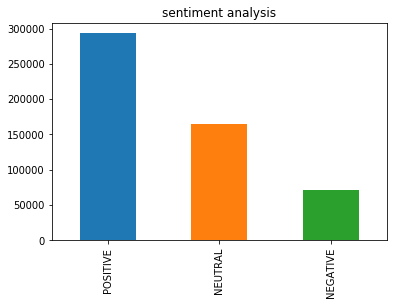

In [39]:
tweets.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [40]:
import ggplot
from ggplot import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.0, 6.0)

tweets['hour'] = pd.DatetimeIndex(tweets['Date']).hour
tweets['date'] = pd.DatetimeIndex(tweets['Date']).date
tweets['minute'] = pd.DatetimeIndex(tweets['Date']).minute
df=(tweets.groupby('hour',as_index=False).sentiment_compound_polarity.mean())
print(ggplot(aes(x='hour',y='sentiment_compound_polarity'),data=df)+geom_line())

ModuleNotFoundError: No module named 'ggplot'

# we could run this test on a specific twitter handle or hashtag. (How have people tweeted about the top players in the league over time?)
# May be better to look these people up by their twitter handle. How can I filter the df to show mention names with the most negative tweets/ which "places" have most negative twitter comments associated with them?

In [53]:
tweets_names = tweets[pd.notnull(tweets['UserMentionNames'])]

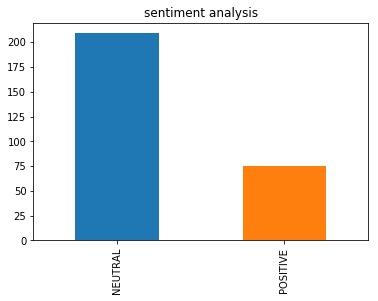

In [71]:
df=tweets_names[tweets_names['UserMentionNames'].str.contains("Ashley Young")]
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

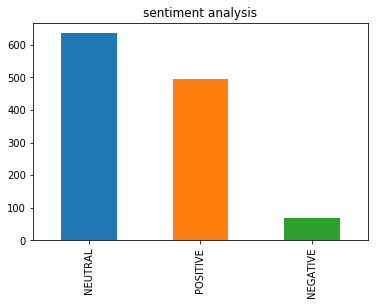

In [72]:
df=tweets_names[tweets_names['UserMentionNames'].str.contains("Cristiano Ronaldo")]
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

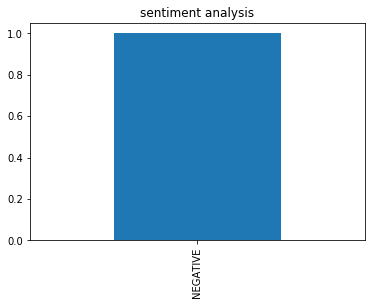

In [74]:
df=tweets_names[tweets_names['UserMentionNames'].str.contains("Diego Costa")]
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

# Sentiment by specific twitter handle

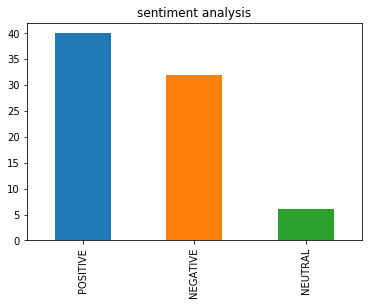

In [75]:
df=tweets_names[tweets_names['UserMentionNames'].str.contains("Lionel Messi")]
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [76]:
tweet_handles = tweets[pd.notnull(tweets['UserMentionID'])]

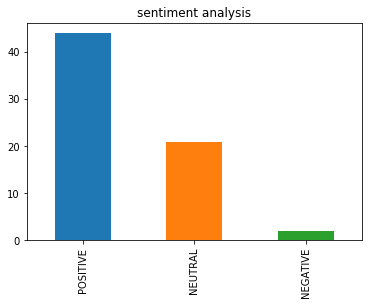

In [78]:
#@wearemessi
df=tweet_handles[tweet_handles['UserMentionID'].str.contains("WeAreMessi")]
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

# Sentiment by specific region

In [81]:
tweet_places = tweets[pd.notnull(tweets['Place'])]


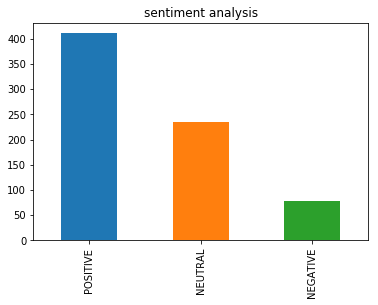

In [86]:
#@wearemessi
df=tweet_places[tweet_places['Place'].str.contains("Madrid")]
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

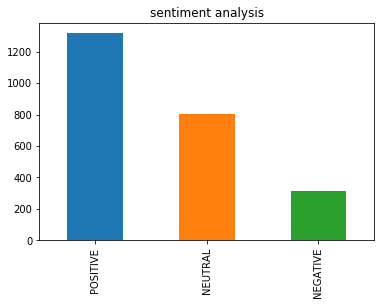

In [87]:
#@wearemessi
df=tweet_places[tweet_places['Place'].str.contains("Accra")]
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")